# Introdução à estatística

De modo bem geral, podemos dizer que a essência da Ciência é a observação e que seu
objetivo básico é a inferência, que pode ser dedutiva (na qual se argumenta das premissas às
conclusões) ou indutiva (por meio da qual se vai do específico ao geral).
A inferência estatística é uma das partes da Estatística. Esta é a parte da metodologia da
Ciência que tem por objetivo a coleta, redução, análise e modelagem dos dados, a partir do
que, finalmente, faz-se a inferência para uma população da qual os dados (a amostra) foram
obtidos. Um aspecto importante da modelagem dos dados é fazer previsões, a partir das
quais se podem tomar decisões.
Na primeira parte deste livro estaremos interessados na redução, análise e interpretação
dos dados sob consideração, adotando um enfoque que chamaremos de análise
exploratória de dados (AED). Nessa abordagem tentaremos obter dos dados a maior
quantidade possível de informação, que indique modelos plausíveis a serem utilizados
numa fase posterior, a análise confirmatória de dados (ou inferência estatística) {cite}`bussab2009estatistica`.



## Modelos

Fundamentalmente, quando se procede a uma análise de dados, busca-se alguma
forma de regularidade ou padrão ou, ainda, modelo, presente nas observações.

Podemos, então, escrever de modo esquemático:

Dados = Modelo + Resíduos

ou, ainda,

$D = M + R$.

A parte M é também chamada parte suave (ou regular ou, ainda, previsível) dos
dados, enquanto R é a parte aleatória. A parte R é tão importante quanto M, e a análise
dos resíduos constitui uma parte fundamental de todo trabalho estatístico. Basicamente,
são os resíduos que nos dizem se o modelo é adequado ou não para representar os
dados.

## Técnicas computacionais
O desenvolvimento rápido e constante na área de computação foi acompanhado pela
introdução de novas técnicas de análise de dados, notadamente de métodos gráficos e de
métodos chamados de computação intensiva (como o método bootstrap, que será tratado
brevemente neste livro).[expandir]

Com o progresso recente da computação gráfica e a existência de hardware e
software adequados, a utilização de métodos gráficos torna-se rotineira na análise
de dados. Contudo, muitos gráficos podem ser feitos sem o recurso de programas de
computador.

## Métodos Gráficos

Como dissemos na introdução, os métodos gráficos têm encontrado um uso cada
vez maior devido ao seu forte apelo visual. Normalmente, é mais fácil para qualquer
pessoa entender a mensagem de um gráfico do que aquela embutida em tabelas ou
sumários numéricos.
Os gráficos são utilizados para diversos fins (Chambers et al., 1983):
1. buscar padrões e relações;
2. confirmar (ou não) certas expectativas que se tinha sobre os dados;
3. descobrir novos fenômenos;
4. confirmar (ou não) suposições feitas sobre os procedimentos estatísticos usados; e
5. apresentar resultados de modo mais rápido e fácil.

### Tipos de Variáveis

Algumas variáveis, como sexo, educação, estado civil, apresentam como possíveis realizações
uma qualidade (ou atributo) do indivíduo pesquisado, ao passo que outras, como
número de filhos, salário, idade, apresentam como possíveis realizações números resultantes
de uma contagem ou mensuração. As variáveis do primeiro tipo são chamadas qualitativas,
e as do segundo tipo, quantitativas. Dentre as variáveis qualitativas, ainda podemos fazer uma distinção entre dois
tipos: variável qualitativa nominal, para a qual não existe nenhuma ordenação nas
possíveis realizações, e variável qualitativa ordinal, para a qual existe uma ordem
nos seus resultados.
De modo análogo, as variáveis quantitativas podem sofrer uma classificação dicotômica:
(a) variáveis quantitativas discretas, cujos possíveis valores formam um conjunto finito
ou enumerável de números, e que resultam, freqüentemente, de uma contagem, como por
exemplo número de filhos (0, 1, 2, ...); (b) variáveis quantitativas contínuas, cujos possíveis
valores pertencem a um intervalo de números reais e que resultam de uma mensuração,
como por exemplo estatura e peso (melhor seria dizer massa) de um indivíduo.

![](figs/func1.png)

## Distribuições de Frequências

Quando se estuda uma variável, o maior interesse do pesquisador é conhecer o comportamento
dessa variável, analisando a ocorrência de suas possíveis realizações. Nesta seção veremos uma maneira de se dispor um conjunto de realizações, para se ter uma idéia global
sobre elas, ou seja, de sua distribuição.

Usaremos
a notação $n_i$ para indicar a freqüência (absoluta) de cada classe, ou categoria, da variável, e a
notação $f_i = n_i/n$ para indicar a proporção (ou freqüência relativa) de cada classe, sendo n
o número total de observações.

In [2]:
import pandas as pd

df = pd.read_csv('questionario.csv')

# Visualizar o cabeçalho do arquivo
df.head()

,Unnamed: 0,Id,Turma,Sexo,Idade,Alt,Peso,Filhos,Fuma,Toler,Exerc,Cine,OpCine,TV,OpTV
0,0,1,A,F,17,1.60,60.5,2,NAO,P,0,1,B,16,R
1,1,2,A,F,18,1.69,55.0,1,NAO,M,0,1,B,7,R
2,2,3,A,M,18,1.85,72.8,2,NAO,P,5,2,M,15,R
3,3,4,A,M,25,1.85,80.9,2,NAO,P,5,2,B,20,R
4,4,5,A,F,19,1.58,55.0,1,NAO,M,2,2,B,5,R


In [2]:
# Obter as contagens para determinada vairável
df.Sexo.value_counts()

F    37
M    13
Name: Sexo, dtype: int64

In [3]:
# Formatar como tabela de frequências
pd.DataFrame([df.Sexo.value_counts(),
              df.Sexo.value_counts()/50],
             index=['ni', 'fi']).T

,ni,fi
F,37.0,0.74
M,13.0,0.26


In [4]:
# Utilizando a frequência acumulada
pd.DataFrame([df.OpTV.value_counts(),
              df.OpTV.value_counts()/50,
              (df.OpTV.value_counts()/50).cumsum()],
              index=['ni', 'fi', 'fa']).T

,ni,fi,fa
R,39.0,0.78,0.78
N,7.0,0.14,0.92
B,3.0,0.06,0.98
M,1.0,0.02,1.00


A construção de tabelas de freqüências para variáveis contínuas necessita de certo
cuidado. Por exemplo, a construção da tabela de freqüências para a variável salário,
usando o mesmo procedimento acima, não resumirá as 36 observações num grupo
menor, pois não existem observações iguais. A solução empregada é agrupar os dados
por faixas de salário.

In [16]:
# Usar função gráfica do histograma
# para armazenar faixas
# Acesse o manual ?plt.hist
import matplotlib.pyplot as plt

# Não mostrar o plot
plt.ioff()
faixas = plt.hist(df.Peso.astype(float),
                  bins=[40, 50, 60, 70, 80, 90, 100])

faixas_imprimir = []

for fx in faixas[1][:(len(faixas[1])-1)]:
  faixas_imprimir.append(f'[{fx},{fx+10})')

pd.DataFrame([faixas_imprimir,
              faixas[0],
              faixas[0]/50,
              (faixas[0]/50).cumsum()],
              index=['faixas', 'ni', 'fi', 'fa']).T
plt.close()

Note que estamos usando a notação [a, b] para o intervalo
de números contendo o extremo a mas não contendo o extremo b. A escolha dos intervalos é arbitrária e a familiaridade do pesquisador com os dados é
que lhe indicará quantas e quais classes (intervalos) devem ser usadas.


## Métodos Gráficos

Como dissemos na introdução, os métodos gráficos têm encontrado um uso cada
vez maior devido ao seu forte apelo visual. Normalmente, é mais fácil para qualquer
pessoa entender a mensagem de um gráfico do que aquela embutida em tabelas ou
sumários numéricos.
Os gráficos são utilizados para diversos fins (Chambers et al., 1983):
1. buscar padrões e relações;
2. confirmar (ou não) certas expectativas que se tinha sobre os dados;
3. descobrir novos fenômenos;
4. confirmar (ou não) suposições feitas sobre os procedimentos estatísticos usados; e
5. apresentar resultados de modo mais rápido e fácil.

### Gráficos para variáveis qualitativas

Existem vários tipos de gráficos para representar variáveis qualitativas. Vários são
versões diferentes do mesmo princípio, logo nos limitaremos a apresentar dois deles:
gráficos em barras e de composição em setores ("pizza" ou retângulos).

O gráfico em barras consiste em construir retângulos ou barras,
em que uma das dimensões é proporcional à magnitude a ser representada ($n_i$ ou $f_i$),
sendo a outra arbitrária, porém igual para todas as barras. Essas barras são dispostas
paralelamente umas às outras, horizontal ou verticalmente.

<Axes: >

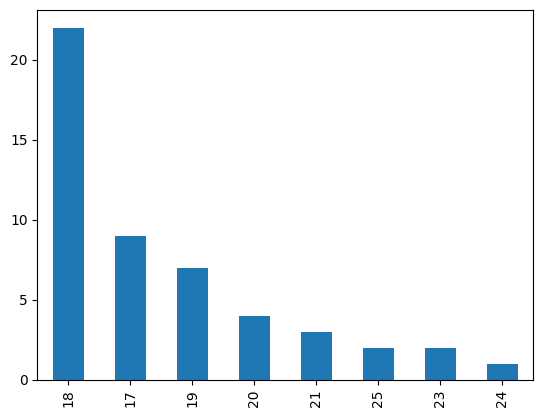

In [10]:
df.Idade.value_counts().plot.bar()

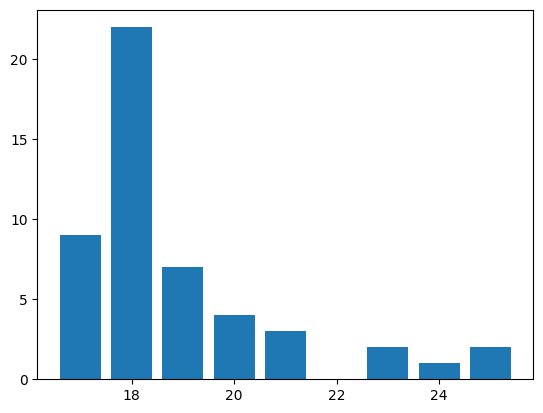

In [19]:
# Uma forma alternativa de criar o gráfico
plt.bar(df.Idade.value_counts().index,
        df.Idade.value_counts())
plt.show()

O gráfico de composição em setores, ou "pizza",
destina-se a representar a composição, usualmente em porcentagem, de partes de um todo.
Consiste num círculo de raio arbitrário, representando o todo, dividido em setores, que
correspondem às partes de maneira proporcional.

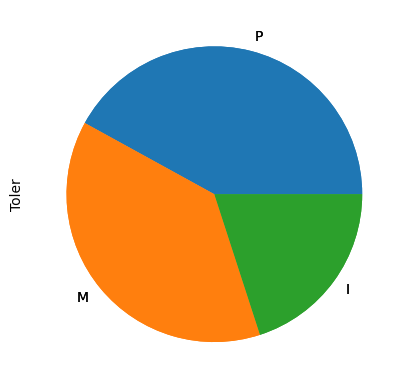

In [23]:
df.Toler.value_counts().plot.pie()
plt.show()

In [11]:
pd.DataFrame(df.Toler.value_counts()).reset_index()

,index,Toler
0,P,21
1,M,19
2,I,10


In [12]:
import plotly.express as px

fig = px.pie(pd.DataFrame(df.Toler.value_counts()).reset_index(),
             values='Toler', names='index')
fig.show()


### Gráficos para variáveis quantitativas

Além dos gráficos usados para as variáveis qualitativas, como ilustrado na Figura 2.4,

Podemos considerar um gráfico chamado gráfico de dispersão unidimensional, como o da
Figura 2.5 (a), em que os valores são representados por pontos ao longo da reta (provida de
uma escala). Valores repetidos são acompanhados por um número que indica as repetições.
Outra possibilidade é considerar um gráfico em que os valores repetidos são “empilhados”,
um em cima do outro, como na Figura 2.5 (b). Pode-se também apresentar o ponto mais alto
da pilha, como aparece na Figura 2.5 (c).

O histograma é um gráfico de barras contíguas, com as bases proporcionais aos intervalos
das classes e a área de cada retângulo proporcional à respectiva freqüência. Pode-se
usar tanto a freqüência absoluta, ni, como a relativa, $f_i$. Indiquemos a amplitude do i-ésimo
intervalo por $\Delta$. Para que a área do retângulo respectivo seja proporcional a $f_i$, a sua altura
deve ser proporcional a $f_i/\Delta_i$ (ou a $n_i/\Delta_i$), que é chamada densidade de freqüência da
i-ésima classe. Quanto mais dados tivermos em cada classe, mais alto deve ser o retângulo.
Com essa convenção, a área total do histograma será igual a um. Quando os intervalos das classes forem todos iguais a $\Delta$, a densidade de freqüência da
i-ésima classe passa a ser $f_i/\Delta$ (ou $n_i/\Delta$). É claro que marcar no eixo das ordenadas os valores
$n_i, f_i, n_i/\Delta$ ou $f_i/\Delta$ leva a obter histogramas com a mesma forma; somente as áreas é que
serão diferentes.

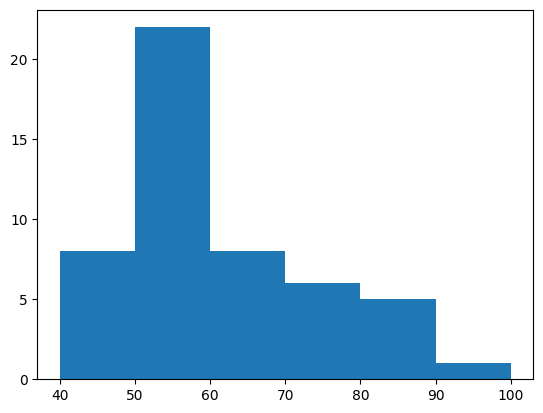

In [26]:
# Representação do histograma com frequências absolutas
plt.hist(df.Peso.astype(float),
                  bins=[40, 50, 60, 70, 80, 90, 100])
plt.show()

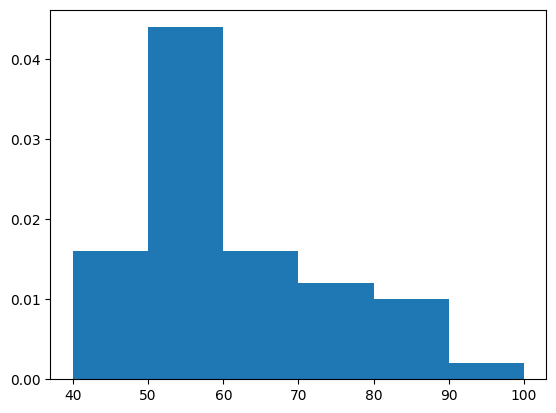

In [27]:
# Representação do histograma com densidades
plt.hist(df.Peso.astype(float),
         bins=[40, 50, 60, 70, 80, 90, 100],
         density=True)
plt.show()

### Quantis Empíricos

Tanto a média como o desvio padrão podem não ser medidas adequadas para representar um conjunto de dados, pois:

1. são afetados, de forma exagerada, por valores extremos;
2. apenas com estes dois valores não temos idéia da simetria ou assimetria da distribuição dos dados.

Para contornar esses fatos, outras medidas têm de ser consideradas.

Vimos que a mediana é um valor que deixa metade dos dados abaixo dela e metade
acima. De modo geral, podemos definir uma medida, chamada _quantil_
de _ordem p_ ou _p-quantil_, indicada por $q(p)$, onde _p_ é uma proporção qualquer, $0 < p < 1$, tal
que $100p\%$ das observações sejam menores do que $q(p)$.
Indicamos, abaixo, alguns quantis e seus nomes particulares.

Quantil | Definição
--- | ---
$q(0.25)=q_1:$ | $1\ulo$ Quatil = $25\ulo$ Percentil
$q(0.50)=q_2:$ | Mediana = $2\ulo$ Quatil = $50\ulo$ Percentil  
$q(0.75)=q_3:$ | $3\ulo$ Quatil = $75\ulo$ Percentil
$q(0.40):$ | $4\ulo$ Decil
$q(0.95):$ | $95\ulo$ Percentil

Se os dados estiverem agrupados em classes, podemos obter os quantis usando o
histograma. Para encontrar a mediana, por exemplo, pela proporcionalidade entre a área e a base do retângulo, temos:

$\frac{12-9}{33\%}=\frac{md-8}{22\%}$

ou

$md-8=\frac{22\%}{33\%} \cdot 4$

logo

$md=10.67$


![alt text](fig/func7.png)

O cálculo dos quantis pode ser feito de modo análogo ao cálculo da mediana,
usando argumentos geométricos no histograma. Uma medida de dispersão alternativa ao desvio padrão é a _distância interquartil_,
definida como a diferença entre o terceiro e primeiro quartis, ou seja,
$d_q=q_3-q_1$
Dizemos que uma medida de localização ou dispersão é resistente quando for
pouco afetada por mudanças de uma pequena porção dos dados. A mediana é uma
medida resistente, ao passo que a média não o é.


Os cinco valores, $x_{(1)}, q_1, q_2, q_3\quad e\quad x_{(n)}$ são importantes para se ter uma boa idéia da
assimetria da distribuição dos dados. Para uma distribuição simétrica ou aproximadamente
simétrica, deveríamos ter:
1. $q_2 – x_{(1)} \approx x_{(n)} – q_2$;
2. $q_2 – q_1 \approx q_3 – q_2$;
3. $q_1 – x_{(1)} \approx x_{(n)} – q_3$;
4. distâncias entre mediana e $q_1, q_3$ menores do que distâncias entre os extremos
e $q_1, q_3$.

A diferença $q_2 – x_{(1)}$ é chamada dispersão inferior e $x_{(n)} – q_2$ é a dispersão superior.
A condição 1 nos diz que estas duas dispersões devem ser aproximadamente
iguais, para uma distribuição aproximadamente simétrica.

A informação contida no esquema dos cinco números  pode ser traduzida
graficamente num diagrama, que chamaremos de box plot ou "caixa-de-bigodes".

Para construir este diagrama, consideremos um retângulo onde estão representados a
mediana e os quartis. A partir do retângulo, para cima, segue uma linha até o ponto mais
remoto que não exceda $LS = q_3 + (1,5)d_q$, chamado limite superior. De modo similar, da
parte inferior do retângulo, para baixo, segue uma linha até o ponto mais remoto que não
seja menor do que $LI = q_1 – (1,5)d_q$, chamado limite inferior. Os valores compreendidos
entre esses dois limites são chamados valores adjacentes. As observações que estiverem
acima do limite superior ou abaixo do limite inferior estabelecidos serão chamadas pontos
exteriores e representadas por asteriscos. Essas são observações destoantes das demais e
podem ou não ser o que chamamos de outliers ou valores atípicos.
O box plot dá uma idéia da posição, dispersão, assimetria, caudas e dados discrepantes.
A posição central é dada pela mediana e a dispersão por $d_q$. As posições relativas de $q_1, q_2, q_3$
dão uma noção da assimetria da distribuição. Os comprimentos das caudas são dados pelas
linhas que vão do retângulo aos valores remotos e pelos valores atípicos.

<Axes: xlabel='Sexo', ylabel='Peso'>

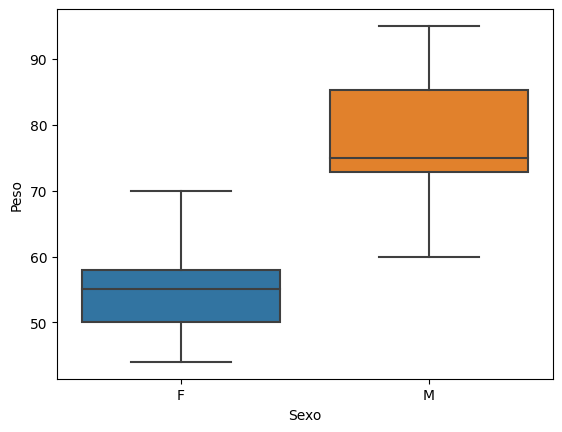

In [13]:
import seaborn as sns

sns.boxplot(data=df, x="Sexo", y="Peso")

### Transformações
Vários procedimentos estatísticos são baseados na suposição de que os dados provêm
de uma distribuição normal (em forma de sino) ou então mais ou menos simétrica.
Mas, em muitas situações de interesse prático, a distribuição dos dados da amostra
é assimétrica e pode conter valores atípicos, como vimos em exemplos anteriores.
Se quisermos utilizar tais procedimentos, o que se propõe é efetuar uma transformação
das observações, de modo a se obter uma distribuição mais simétrica e próxima
da normal. Uma família de transformações frequentemente utilizada é

$$
x^{(p)} = \left\{\begin{matrix}
x^p & se\quad p>0; \\
\ln(x) & se\quad p=0;  \\
-x^p & se\quad p<0.
\end{matrix}\right.
$$

Normalmente, o que se faz é experimentar valores de p na seqüência
$\dots , –3, –2, –1, – 1/2, – 1/3, – 1/4, 0, 1/4, 1/3, 1/2, 1, 2, 3, \ldots$
e para cada valor de $p$ obtemos gráficos apropriados (histogramas, desenhos esquemáticos etc.)
para os dados originais e transformados, de modo a escolhermos o valor mais adequado de p.
Vimos que, para dados positivos, a distribuição dos dados é usualmente assimétrica à
direita. Para essas distribuições, a transformação acima com $0 < p < 1$ é apropriada, pois
valores grandes de x decrescem mais, relativamente a valores pequenos. Para distribuições
assimétricas à esquerda, tome $p > 1$.


```{bibliography}
```

# Relações entre as variáveis

## Diagrama de dispersão

In [5]:
import plotly.io as pio
import plotly.express as px
import plotly.offline as py

fig = px.scatter(df, x="Peso", y="Alt", color="Sexo")
fig